# Loaded Dice

Tommy seems to be winning a lot of games recently. You are, in fact, *highly suspicious* of his treasured dice. So you've been recording the result of every role, and they are in `loaded_500.txt`. 

Let's try and answer the simplest question we can: Is *Tommy* rolling too many sixes?

Let's answer the question rigorously.

1. Visualise the data. Make sure we understand it.
2. Reduce or quantify the data
3. Pose our hypothesis (and visualise)
4. Calculate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('../data/loaded_500.txt')

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


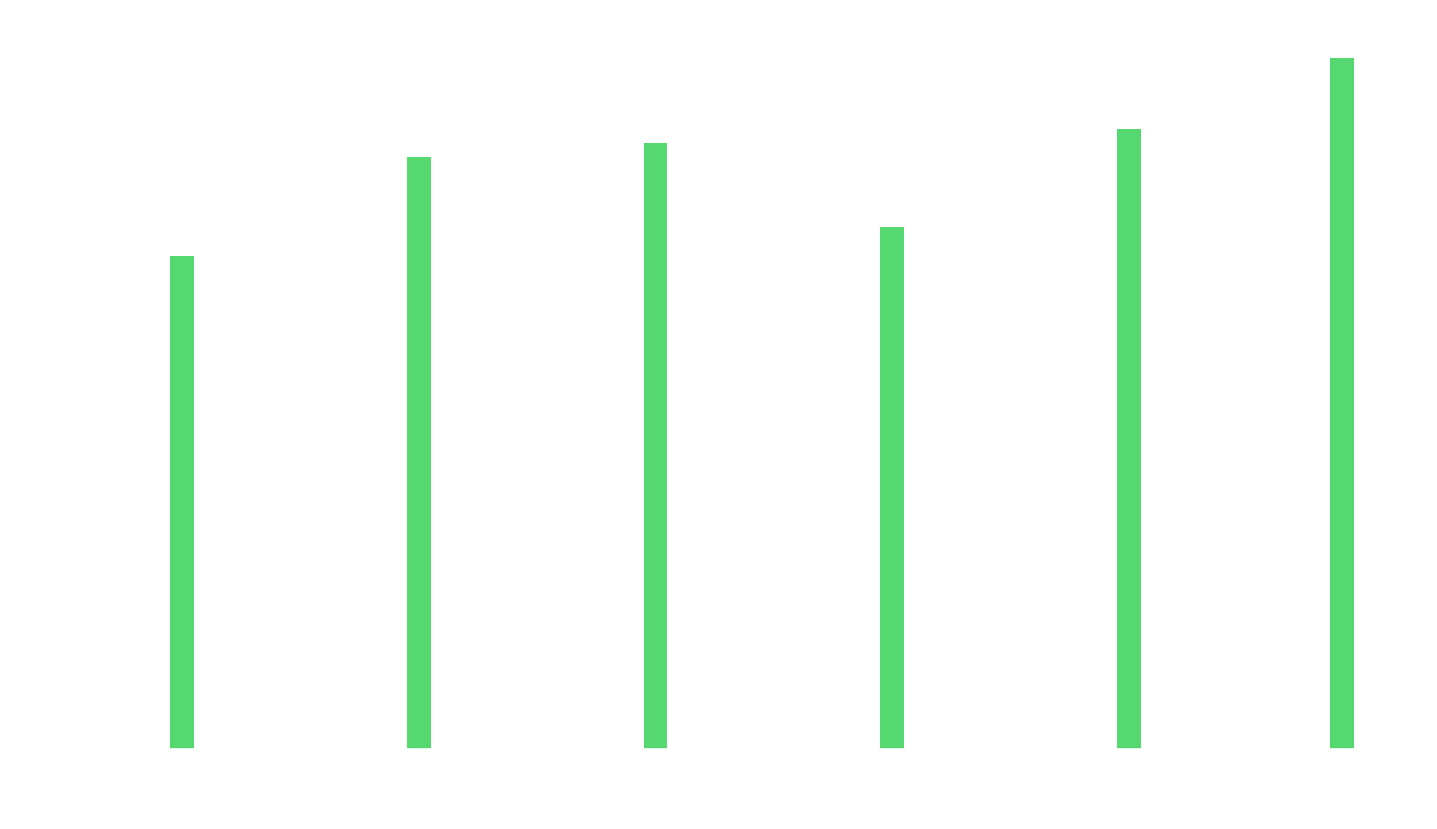

In [3]:
unique, counts = np.unique(data, return_counts=True)
print(unique, counts)
plt.hist(data);

In [4]:
num_sixes = (data == 6).sum()
num_total = data.size

### Pose our Hypothesis

We have two outcomes when we roll a dice. We roll a six, or we roll something else. With a fair die (our null hypothesis), $p(6) = \frac{1}{6}$. As this is discrete with two options, we are looking at the *binomial* distribution.

What is the chance we roll 98 *or more* sixes with a fair die?

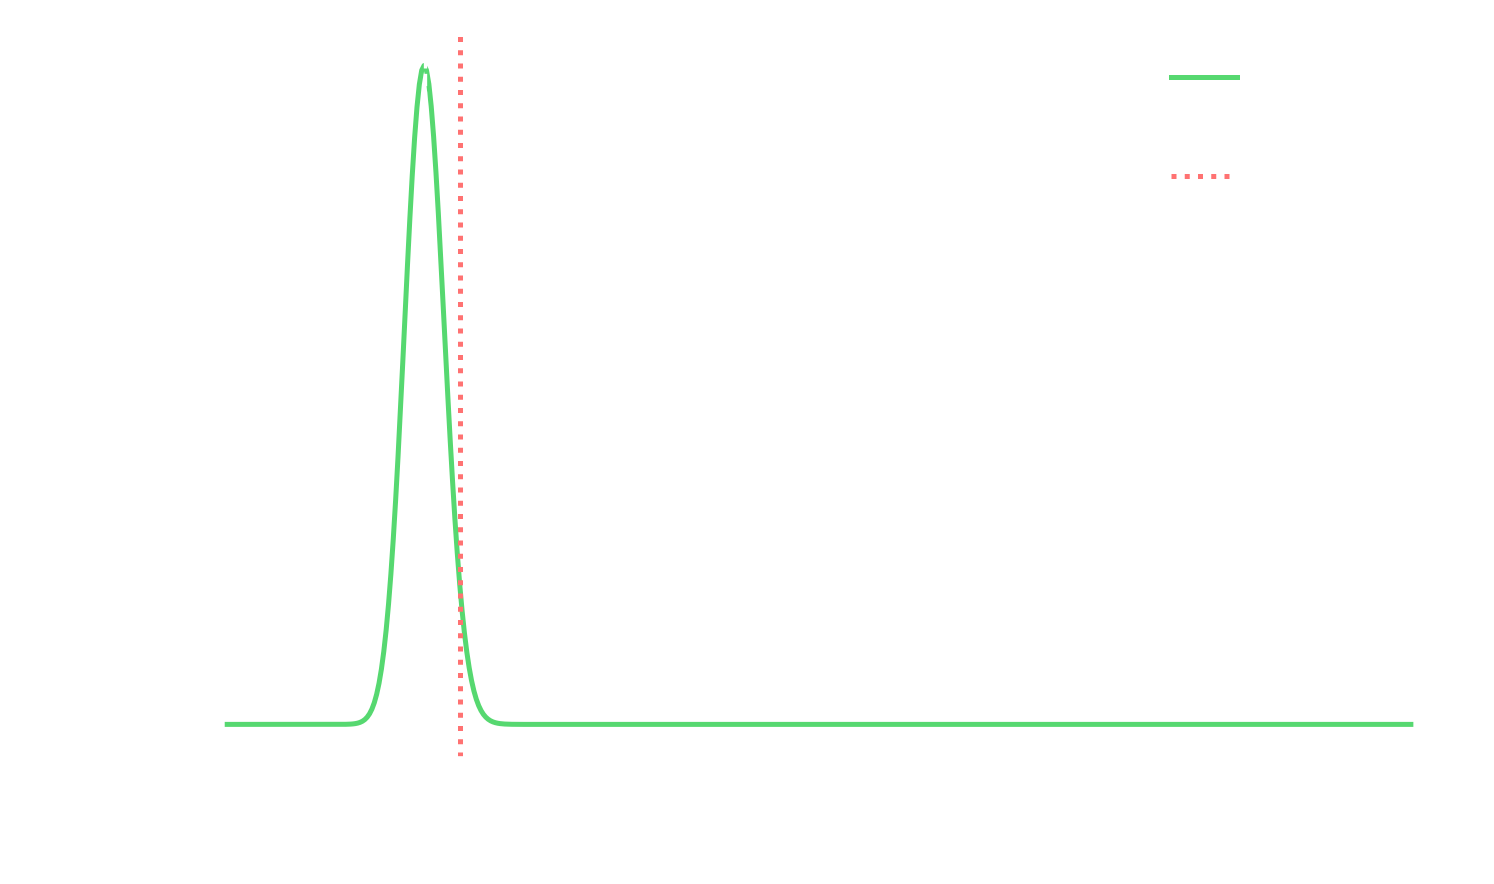

In [26]:
from scipy.stats import binom
n = np.arange(num_total) # 0 -> 499 = 500
prob_n = binom.pmf(n, num_total, 1/6)
plt.plot(n, prob_n, label='Prob num' )
plt.axvline(num_total / 6, ls='--', lw=1, label='Mean num')
plt.axvline(num_sixes, ls=':', color="#ff7272", label='Obs num')
plt.xlabel(f'Num sixes rolled out of {num_total} rolls')
plt.ylabel('Probability')
plt.legend();


0.03657020131026334
Only 3.7% of the time with a fair dice you'd roll more than this many sixes.


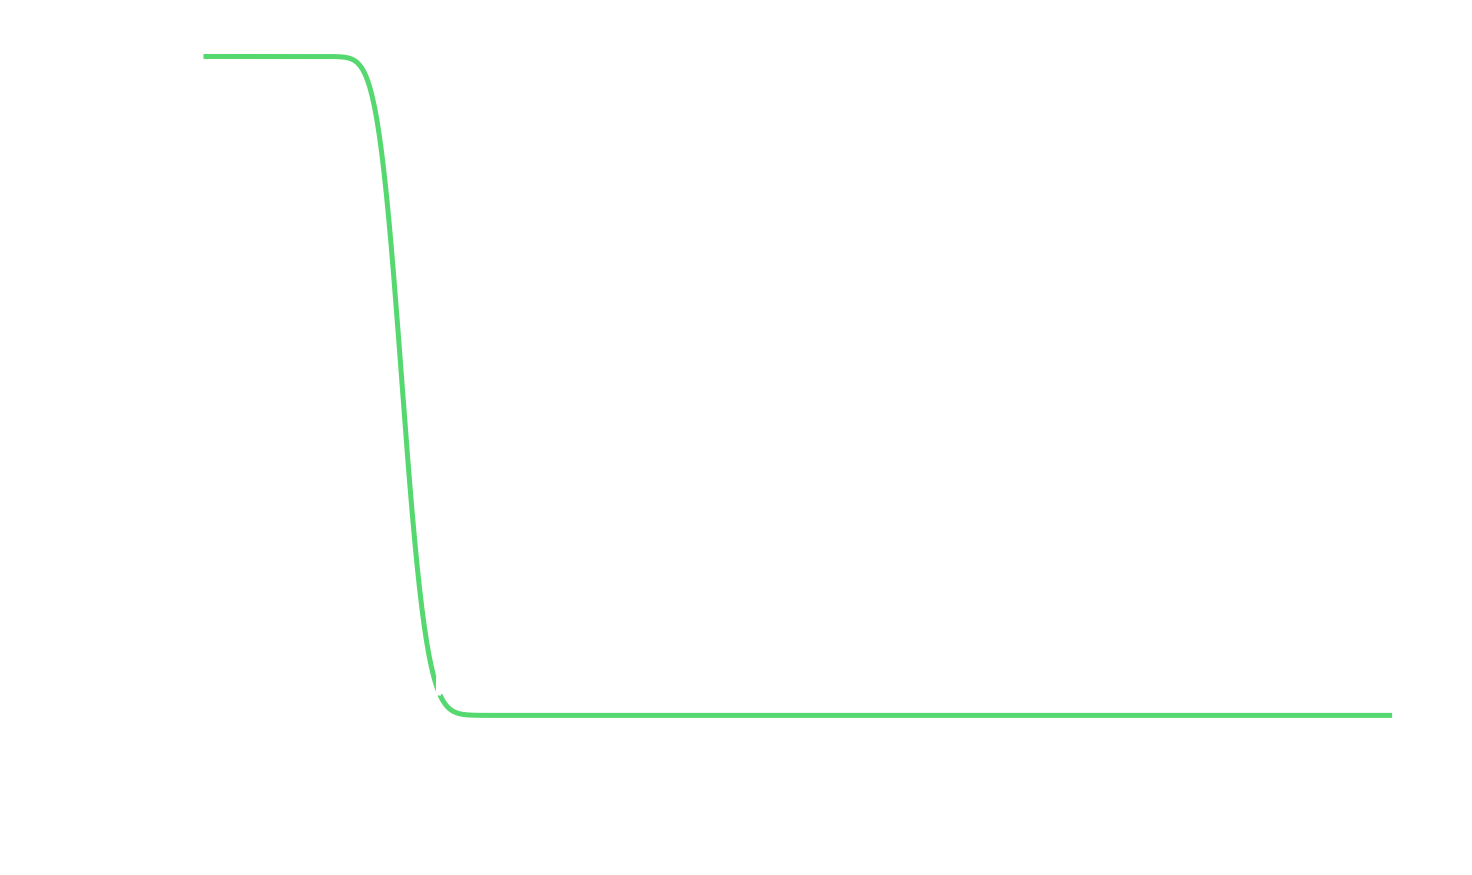

In [20]:
# The whole sample, the probability of one of the hypotesis 
d = binom(num_total, 1/6)
# The survival function of that binomial distribution
plt.plot(n, d.sf(n));
plt.axvline(num_sixes, ls='--')
# survival function
sf = d.sf(num_sixes)
print(sf)
plt.axhline(sf, ls='--')
plt.xlabel('Num sixes')
plt.ylabel('SF');
print(f"Only {sf * 100:.1f}% of the time with a fair dice you'd roll more than this many sixes.")
# CDF is <= k, so SF >k, not >= k;

## The survival function tell us that the probability of having more than 98 times sixes in 500 tries is only 3.7% so; the guy might be cheating; 

CDF + SF = PDF;